# Introduction

This lab demonstrates how to use Kernel PCA to denoise images. The idea is to learn a PCA basis on noise-free images and use it to reconstruct and denoise the noisy images. We use USPS digits dataset for this purpose.

# Load the dataset via OpenML

We load the USPS digits dataset using **fetch_openml()** function from scikit-learn. The data is then normalized using **MinMaxScaler().**

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True, parser="pandas")
X = MinMaxScaler().fit_transform(X)

# Create Training and Testing Sets

We split the dataset into a training set with 1000 samples and a testing set with 100 samples. We add Gaussian noise to the testing set and create two copies of the original data; one with noise and one without noise.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, train_size=1_000, random_state=42, stratify=y)

rng = np.random.RandomState(42)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

# Plot Test Images

We define a helper function to plot the test images. We use this function to plot the uncorrupted and noisy test images.

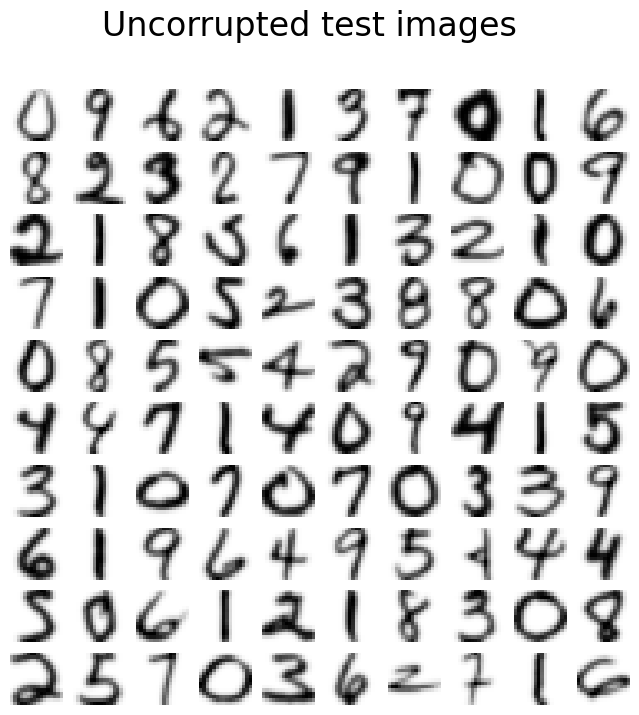

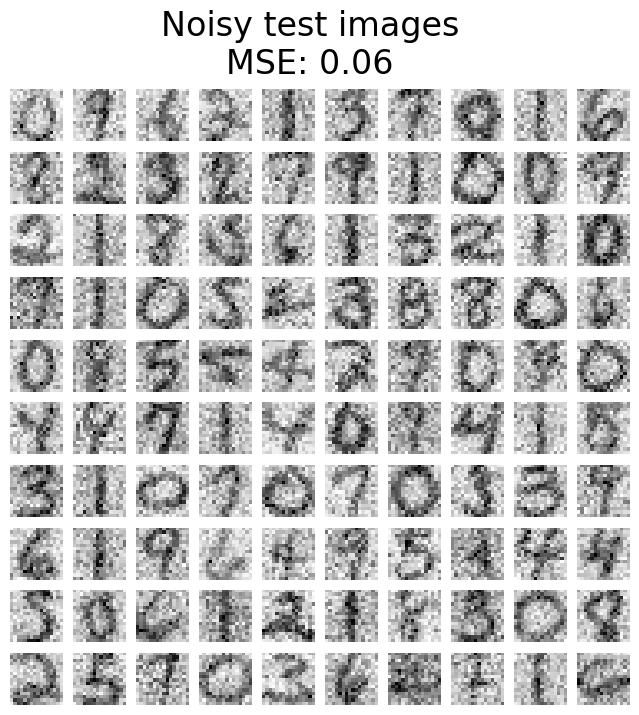

In [4]:
import matplotlib.pyplot as plt

def plot_digits(X, title):
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(X_test, "Uncorrupted test images")
plot_digits(
    X_test_noisy, f"Noisy test images\nMSE: {np.mean((X_test - X_test_noisy) ** 2):.2f}"
)

# Learn the PCA Basis

We learn the PCA basis using both linear PCA and kernel PCA. Kernel PCA uses radial basis function (RBF) kernel to learn the basis.

In [6]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=32, random_state=42)
kernel_pca = KernelPCA(
    n_components=400,
    kernel="rbf",
    gamma=1e-3,
    fit_inverse_transform=True,
    alpha=5e-3,
    random_state=42,
)

pca.fit(X_train_noisy)
_ = kernel_pca.fit(X_train_noisy)

# Reconstruct and Denoise Test Images

We transform and reconstruct the noisy test set using both PCA and kernel PCA. We then plot the reconstructed images to compare the results.

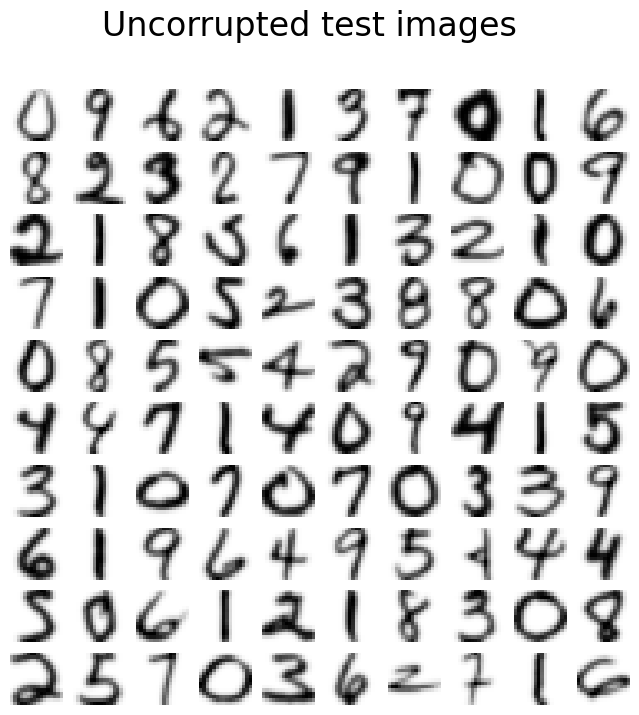

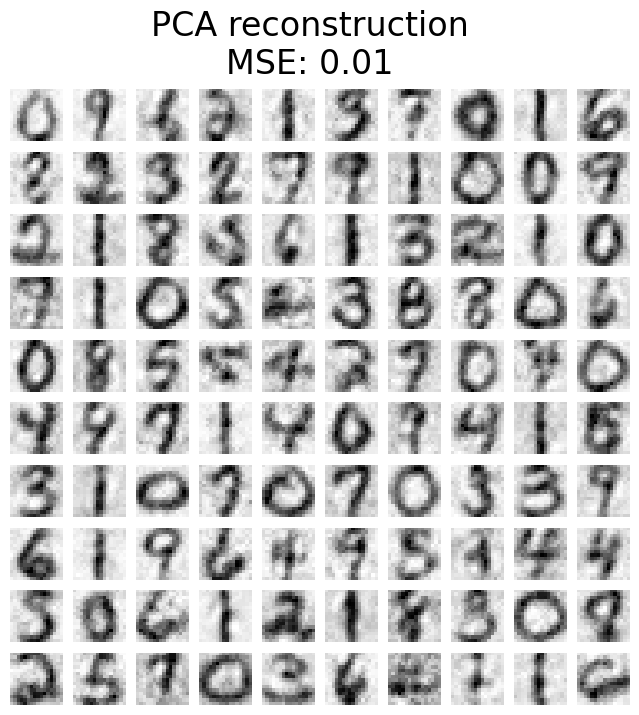

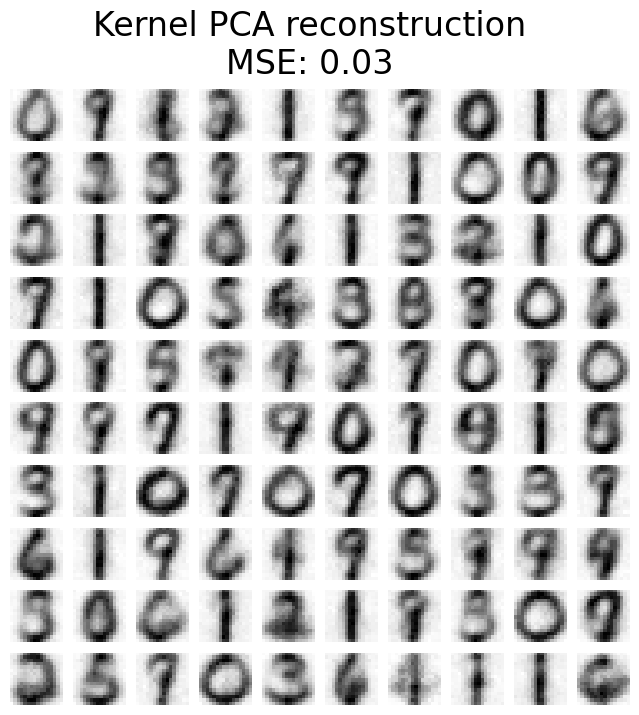

In [7]:
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(
    kernel_pca.transform(X_test_noisy)
)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisy))

plot_digits(X_test, "Uncorrupted test images")
plot_digits(
    X_reconstructed_pca,
    f"PCA reconstruction\nMSE: {np.mean((X_test - X_reconstructed_pca) ** 2):.2f}",
)
plot_digits(
    X_reconstructed_kernel_pca,
    (
        "Kernel PCA reconstruction\n"
        f"MSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}"
    ),
)

# Summary

In this lab, we learned how to use Kernel PCA to denoise images. We used USPS digits dataset to demonstrate the process. We learned a PCA basis on noise-free images and used it to reconstruct and denoise the noisy images. We compared the results of both linear PCA and kernel PCA, and found that kernel PCA is more efficient in removing background noise and providing smoother images. However, we need to be careful in selecting the appropriate values for **n_components**, **gamma**, and **alpha**.